In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [12]:
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\index_cc_v1_historical_days_cadli_BTC-USD_to_ts_1737566144_limit_5000.csv', encoding='utf-8')


In [13]:
def convert_to_stuct(df):
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')  
    df.drop(columns=["UNIT","TYPE","MARKET","FIRST_MESSAGE_TIMESTAMP","LAST_MESSAGE_TIMESTAMP","FIRST_MESSAGE_VALUE",
         "HIGH_MESSAGE_VALUE","LOW_MESSAGE_VALUE",
         "LOW_MESSAGE_TIMESTAMP","LAST_MESSAGE_VALUE","HIGH_MESSAGE_TIMESTAMP",
                   "VOLUME_TOP_TIER","QUOTE_VOLUME_TOP_TIER",
                   "VOLUME_TOP_TIER_DIRECT","VOLUME_DIRECT","TOTAL_INDEX_UPDATES",
                    "QUOTE_VOLUME_DIRECT","QUOTE_VOLUME_TOP_TIER_DIRECT"],inplace=True)

    #df['volume_ratio'] = df['QUOTE_VOLUME_TOP_TIER_DIRECT'] / df['QUOTE_VOLUME']
    
    print(f"{df.duplicated().sum()}")
    
    return df
    

In [14]:
final_df=convert_to_stuct(df)

0


In [15]:
df2=final_df.copy()

In [16]:
final_df=final_df.set_index('TIMESTAMP')

In [17]:
final_df

,INSTRUMENT,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_VOLUME
TIMESTAMP,,,,,,,
2011-05-17,BTC-USD,7.978512,8.389009,6.994878,7.226054,35345.455000,2.658689e+05
2011-05-18,BTC-USD,7.226054,7.499902,6.600000,6.880000,25403.435000,1.813312e+05
2011-05-19,BTC-USD,6.880000,7.339700,6.610000,6.806243,24436.409000,1.701348e+05
2011-05-20,BTC-USD,6.806243,7.099905,5.590100,5.590390,44460.435000,2.789923e+05
2011-05-21,BTC-USD,5.590390,6.514000,5.590390,6.119733,31111.902000,1.856402e+05
...,...,...,...,...,...,...,...
2025-01-18,BTC-USD,104114.678799,104951.825464,102289.052325,104441.397878,273465.987924,2.837013e+10
2025-01-19,BTC-USD,104441.397878,106296.732518,99751.603698,101292.641209,424237.748592,4.417980e+10
2025-01-20,BTC-USD,101292.641209,109134.786742,99563.706027,102228.253669,714224.515381,7.488447e+10


In [18]:
final_df.duplicated().sum()

5

In [19]:
final_df[final_df.duplicated()]

,INSTRUMENT,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_VOLUME
TIMESTAMP,,,,,,,
2011-06-21,BTC-USD,17.51,17.51,17.51,17.51,0.0,0.0
2011-06-22,BTC-USD,17.51,17.51,17.51,17.51,0.0,0.0
2011-06-23,BTC-USD,17.51,17.51,17.51,17.51,0.0,0.0
2011-06-24,BTC-USD,17.51,17.51,17.51,17.51,0.0,0.0
2011-06-25,BTC-USD,17.51,17.51,17.51,17.51,0.0,0.0


In [20]:
final_df['zero_volume_flag']= (final_df['VOLUME'] == 0).astype(int)


In [21]:
(final_df['zero_volume_flag']==1).sum()

6

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2011-05-17 to 2025-01-22
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTRUMENT        5000 non-null   object 
 1   OPEN              5000 non-null   float64
 2   HIGH              5000 non-null   float64
 3   LOW               5000 non-null   float64
 4   CLOSE             5000 non-null   float64
 5   VOLUME            5000 non-null   float64
 6   QUOTE_VOLUME      5000 non-null   float64
 7   zero_volume_flag  5000 non-null   int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 332.0+ KB


<Axes: title={'center': 'Bitcoin Price Over Time'}, xlabel='TIMESTAMP'>

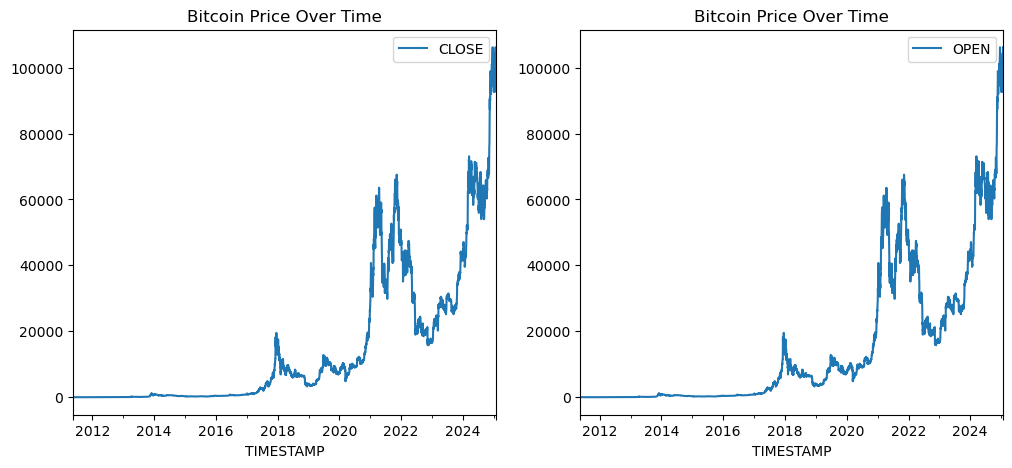

In [23]:
plt.figure(figsize=(10,11))
plt.subplot(121)
final_df['CLOSE'].plot(figsize=(12,5), title="Bitcoin Price Over Time",legend='Close')


plt.subplot(122)
final_df['OPEN'].plot(figsize=(12,5), title="Bitcoin Price Over Time",legend='Open')



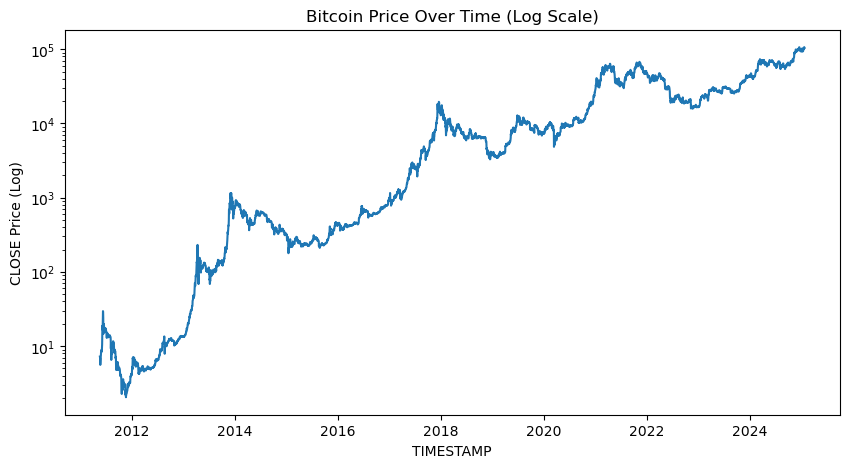

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(final_df.index, final_df['CLOSE'])
plt.yscale('log')  # Log scale for better visualization
plt.title("Bitcoin Price Over Time (Log Scale)")
plt.xlabel("TIMESTAMP")
plt.ylabel("CLOSE Price (Log)")
plt.show()


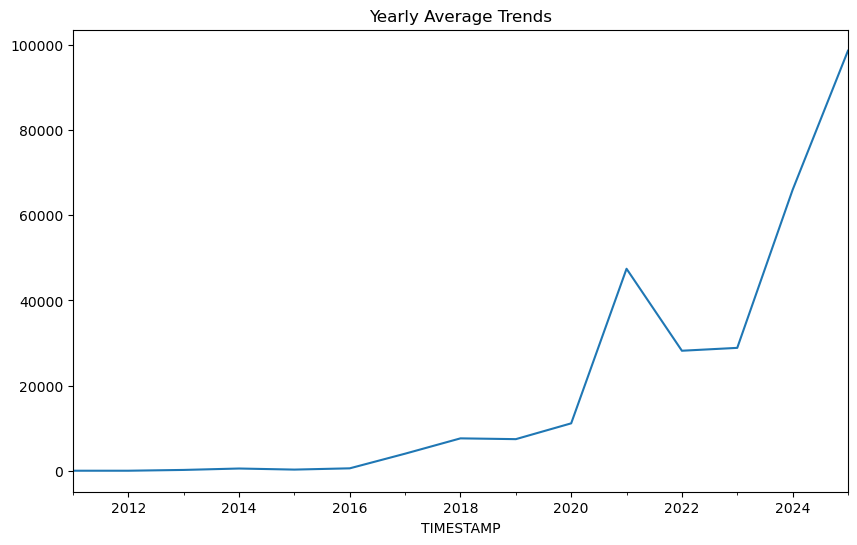

In [25]:
final_df['CLOSE'].resample('Y').mean().plot(figsize=(10,6), title="Yearly Average Trends")
plt.show()


In [26]:
final_df.drop(columns=['INSTRUMENT'],inplace=True)

In [27]:
final_df.loc['20-2-1':'2020-12-31']['CLOSE'].mean()

3300.082940813665

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

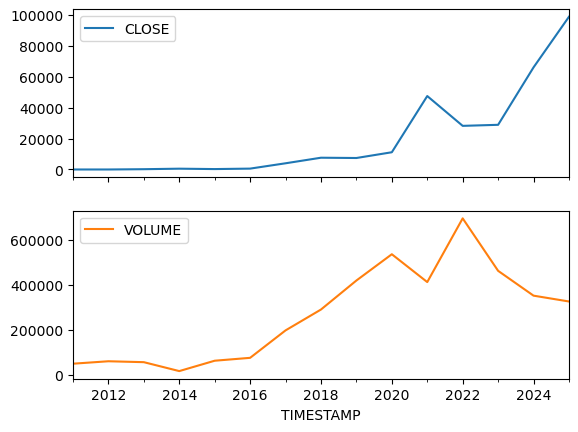

In [28]:
final_df.resample('Y').mean()[['CLOSE', 'VOLUME']].plot(subplots=True)


<Axes: xlabel='TIMESTAMP'>

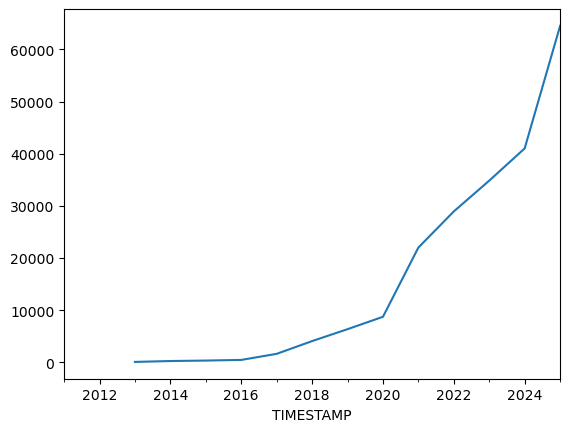

In [29]:
final_df['CLOSE'].resample('1y').mean().rolling(3).mean().plot()


In [30]:
from pymannkendall import original_test
yearly_close = final_df['CLOSE'].resample('Y').mean()
print(original_test(yearly_close))


Mann_Kendall_Test(trend='increasing', h=True, p=2.0264559448257558e-06, z=4.7507679293317775, Tau=0.9238095238095239, s=97.0, var_s=408.3333333333333, slope=3458.5883611486415, intercept=-16785.169435939508)


In [31]:
#!pip install pymannkendall

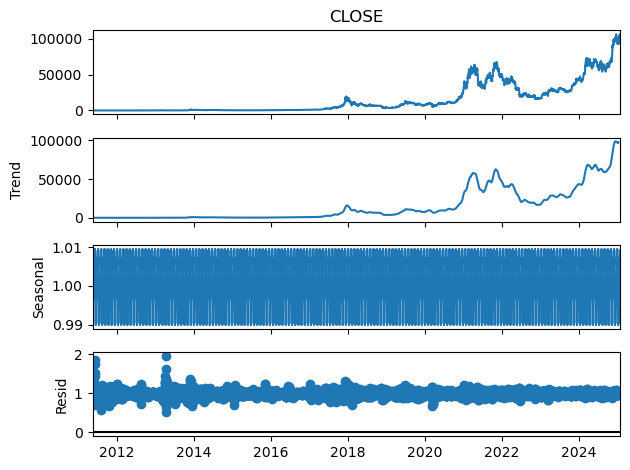

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(final_df['CLOSE'], model='multiplicative', period=30)  # Use additive if no exponential growth
decomp.plot()
plt.show()

------------------
# conclusion -> 1
-> there is the tred but not strongly because it stable little bit from 2011 to 2017 then desc and then again increase

-> there is significant patterns in yearly after the removing the trend

---------------------


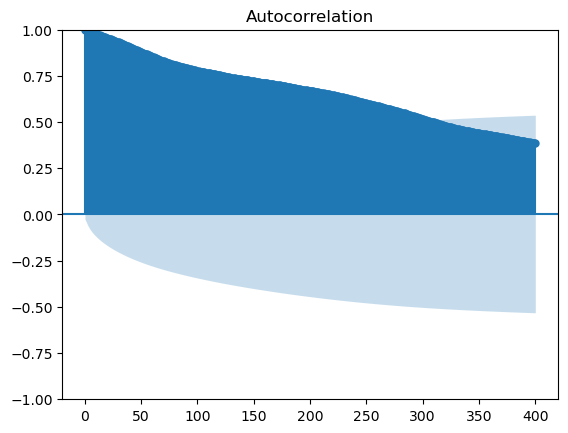

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(final_df['CLOSE'], lags=400)  # Adjust lags based on data frequency
plt.show()





----------------
## conclusion -> 2
-> there is high correlation at the lag of 1 gradually decreases over time instead of dropping suddenly which shows there is trend that depend on the past data and there no stationary and not even seasonality 


--------------------------

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

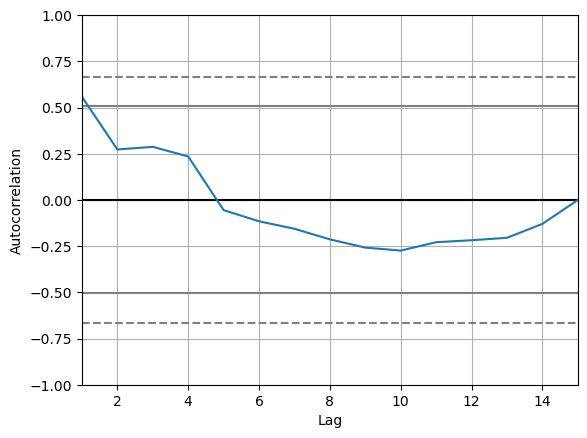

In [34]:
pd.plotting.autocorrelation_plot(final_df['CLOSE'].resample('1y').mean())

 ------------------------------------
## conclusion -> 3

 Bitcoin follows long-term trends but starts losing correlation after ~5 years.

 Possible mean-reversion in the long run (autocorrelation dips below zero).

 No strong seasonal pattern (if there was, we’d see peaks at specific lags).

------------------------------

In [35]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(final_df['CLOSE'],'ct')

print(f"stats : {stats}")
print(f"p values : {p} ")
print(f"lags : {lags}")
print(f"critical_values : {critical_values}")


# p value is less then 0.05 which is it reject the null hypothesis which is there is no statisonry 



stats : 1.1798817872057372
p values : 0.01 
lags : 42
critical_values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


C:\Users\Dell\AppData\Local\Temp\ipykernel_1340\3229372010.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats,p,lags,critical_values=kpss(final_df['CLOSE'],'ct')


In [36]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(final_df['CLOSE'])

print(f"stats : {result[0]}")
print(f"p values : {result[1]} ")
print(f"critical_values : {result[4]}")


stats : 0.9396154890002992
p values : 0.9935861409780152 
critical_values : {'1%': -3.4316669649844727, '5%': -2.8621219552891963, '10%': -2.5670797756478825}


----------------------------

## conclusion on stationary
-> kpss has p_value is less then 0.05 which means it rejects the null hypo which is there is no stationary

-> adf has p_value is grather then 0.05 which means it fail to reject hypo which is there is no stationary

----------------------------


# final conclusion 

->  Trend detected: Data is not stationary, suggesting an increasing/decreasing trend over time.
    
->   No strong seasonality: ACF does not show a clear repeating pattern.
    
->   if we decomse then we can have seasonality at the period of 365

---------------------------

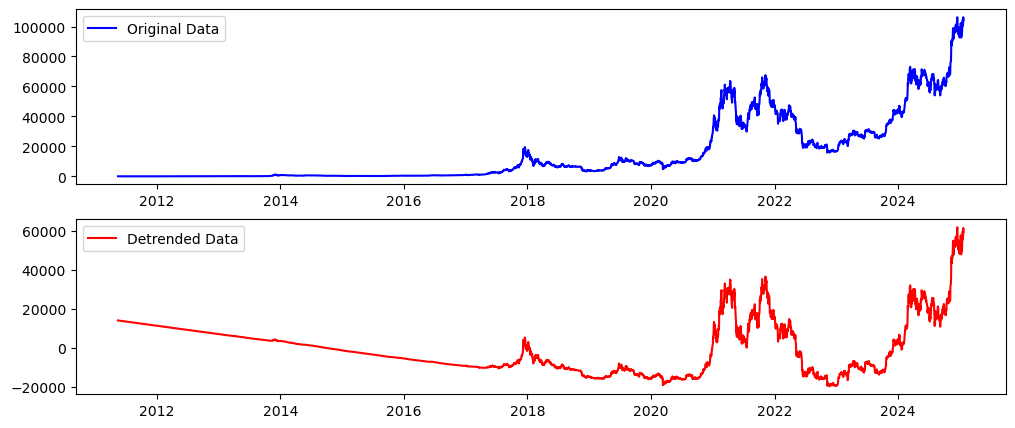

ADF Statistic: -0.871407919610421
P-Value: 0.7972423432197483
❌ Still non-stationary, consider more transformations.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS, add_constant

# Assuming `final_df` contains the time series data
fdf = final_df.copy()

#  First-order differencing
fdf['detrended'] = fdf['CLOSE'].diff()

#  Remove trend using linear regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['CLOSE'].values

# Fit a linear model
X_const = add_constant(X)  # Add constant for intercept
model = OLS(y, X_const).fit()
fdf['trend_removed'] = fdf['CLOSE'] - model.fittedvalues  # Remove trend component

#  Plot the results
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(fdf['CLOSE'], label='Original Data', color='blue')
plt.legend()
plt.subplot(2,1,2)
plt.plot(fdf['trend_removed'], label='Detrended Data', color='red')
plt.legend()
plt.show()

# Check Stationarity (ADF Test)
adf_result = adfuller(fdf['trend_removed'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print(" The data is now stationary!")
else:
    print(" Still non-stationary, consider more transformations.")


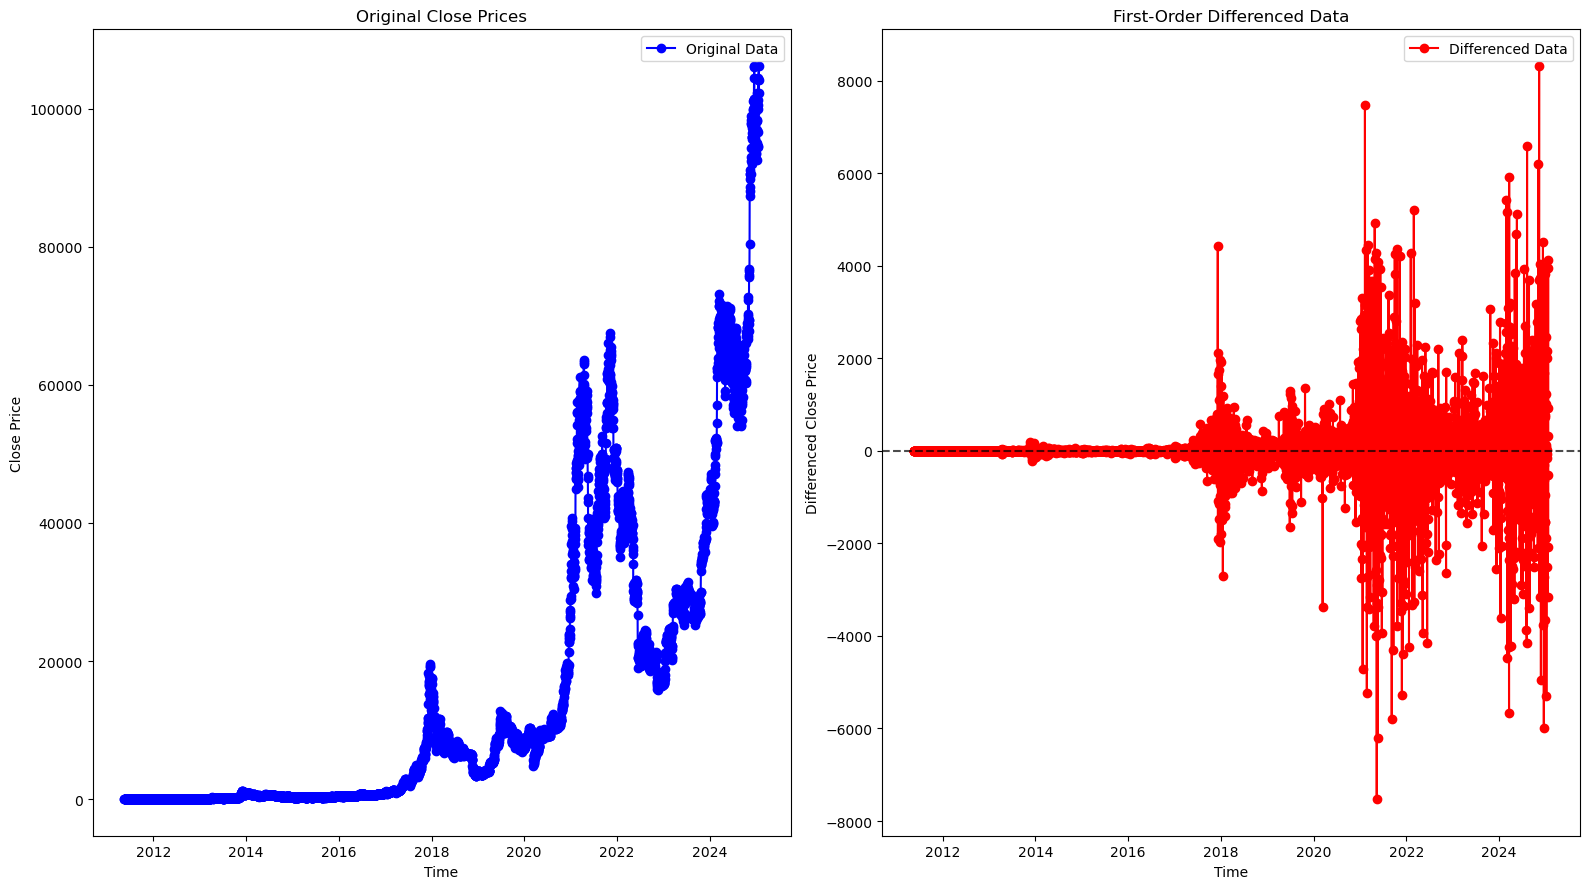

In [38]:

final_df['diff_close'] = final_df['CLOSE'].diff()

plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
plt.plot(final_df['CLOSE'], marker='o', linestyle='-', color='blue', label="Original Data")
plt.title("Original Close Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()

# Differenced Data
plt.subplot(1, 2, 2)
plt.plot(final_df['diff_close'], marker='o', linestyle='-', color='red', label="Differenced Data")
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)  # Reference line at zero
plt.title("First-Order Differenced Data")
plt.xlabel("Time")
plt.ylabel("Differenced Close Price")
plt.legend()

plt.tight_layout()
plt.show()

### conclusion

**Original Prices Are Non-Stationary:** Prices have a trend (upward movement), so models like ARIMA won’t work well directly.
    
**Differencing Helps:** The right plot suggests that taking the first difference may help stabilize the mean, but variance is still high.

# feature engineering

In [39]:
df2.drop(columns=['INSTRUMENT'],inplace=True)

In [41]:
df2.describe()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_VOLUME
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,2018-03-20 12:00:00,15194.605970,15556.337226,14821.385867,15215.425095,2.698537e+05,6.216629e+09
min,2011-05-17 00:00:00,2.050135,2.249777,2.001710,2.050135,0.000000e+00,0.000000e+00
25%,2014-10-17 18:00:00,336.260586,346.448648,325.833317,336.662649,4.912565e+04,9.710557e+06
50%,2018-03-20 12:00:00,5333.490432,5470.146937,5145.418311,5337.656520,1.931403e+05,1.273302e+09
75%,2021-08-21 06:00:00,23329.459108,23885.414456,22900.201659,23361.502659,3.726767e+05,9.782842e+09
max,2025-01-22 00:00:00,106188.135939,109134.786742,105395.742955,106188.135939,3.137129e+06,1.047658e+11
std,NaN,21605.657053,22089.684232,21124.344718,21641.144271,2.943687e+05,9.642827e+09


In [31]:
df2['mid_trend_d']=df2['CLOSE'].rolling(window=20).mean()

df2['weight_mid_t_d']=df2['CLOSE'].ewm(span=20,adjust=False).mean()



#df2['long_trend_d']=df2['CLOSE'].rolling(window=).mean()

#df2['weight_long_t_d']=df2['CLOSE'].ewm(span=200,adjust=False).mean()




df2['market_up_down']=df2['OPEN']-df2['CLOSE']
df2['price_fluctuations']=df2['HIGH']-df2['LOW']
df2['upper_markert_analysis']=df2['HIGH'] - df2['OPEN']
df2['down_markert_analysis']=df2['CLOSE']- df2['LOW']

df2['short_trend_d']=df2['CLOSE'].rolling(window=14).mean()
df2['short_trend_d_var']=df2['CLOSE'].rolling(window=14).std()


df2['close_p_change']=df2['CLOSE'].pct_change()

df2['volume_past_direction'] = df2['VOLUME'].rolling(window=14).mean()

df2['Volume_Change'] = df2['VOLUME'].pct_change()


df2['OPEN_lag1'] = df2['OPEN'].shift(1)
df2['CLOSE_lag1'] = df2['CLOSE'].shift(1)
df2['HIGH_lag1'] = df2['HIGH'].shift(1)
df2['LOW_lag1'] = df2['LOW'].shift(1)



df2.dropna(inplace=True)


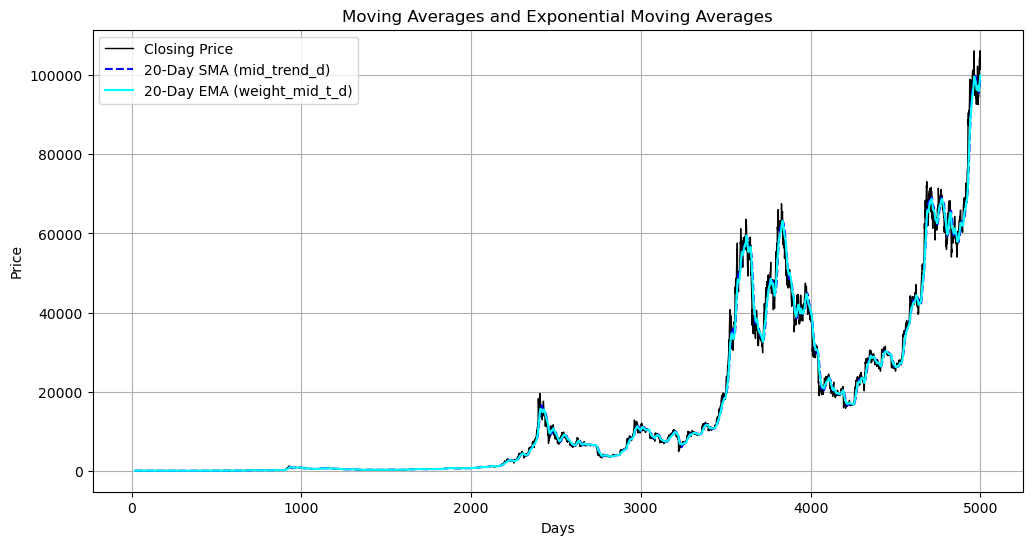

In [32]:
plt.figure(figsize=(12, 6))

# Plot closing prices
plt.plot(df2['CLOSE'], label="Closing Price", color='black', linewidth=1)

# Plot moving averages
plt.plot(df2['mid_trend_d'], label="20-Day SMA (mid_trend_d)", color='blue', linestyle="dashed")
plt.plot(df2['weight_mid_t_d'], label="20-Day EMA (weight_mid_t_d)", color='cyan')

# Plot long-term trends
#plt.plot(df2['long_trend_d'], label="200-Day SMA (long_trend_d)", color='red', linestyle="dashed")
#plt.plot(df2['weight_long_t_d'], label="200-Day EMA (weight_long_t_d)", color='orange')

# Labels and title
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Moving Averages and Exponential Moving Averages")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [33]:
df2[['OPEN','CLOSE','market_up_down']].head(10)

,OPEN,CLOSE,market_up_down
19,18.805858,16.608139,2.197719
20,16.608139,18.452508,-1.844369
21,18.452508,23.888423,-5.435916
22,23.888423,29.600000,-5.711577
23,29.600000,28.925239,0.674761
24,28.925239,23.949700,4.975539
25,23.949700,14.651104,9.298596
26,14.651104,18.546443,-3.895339
27,18.546443,19.835676,-1.289234
28,19.835676,19.353565,0.482112


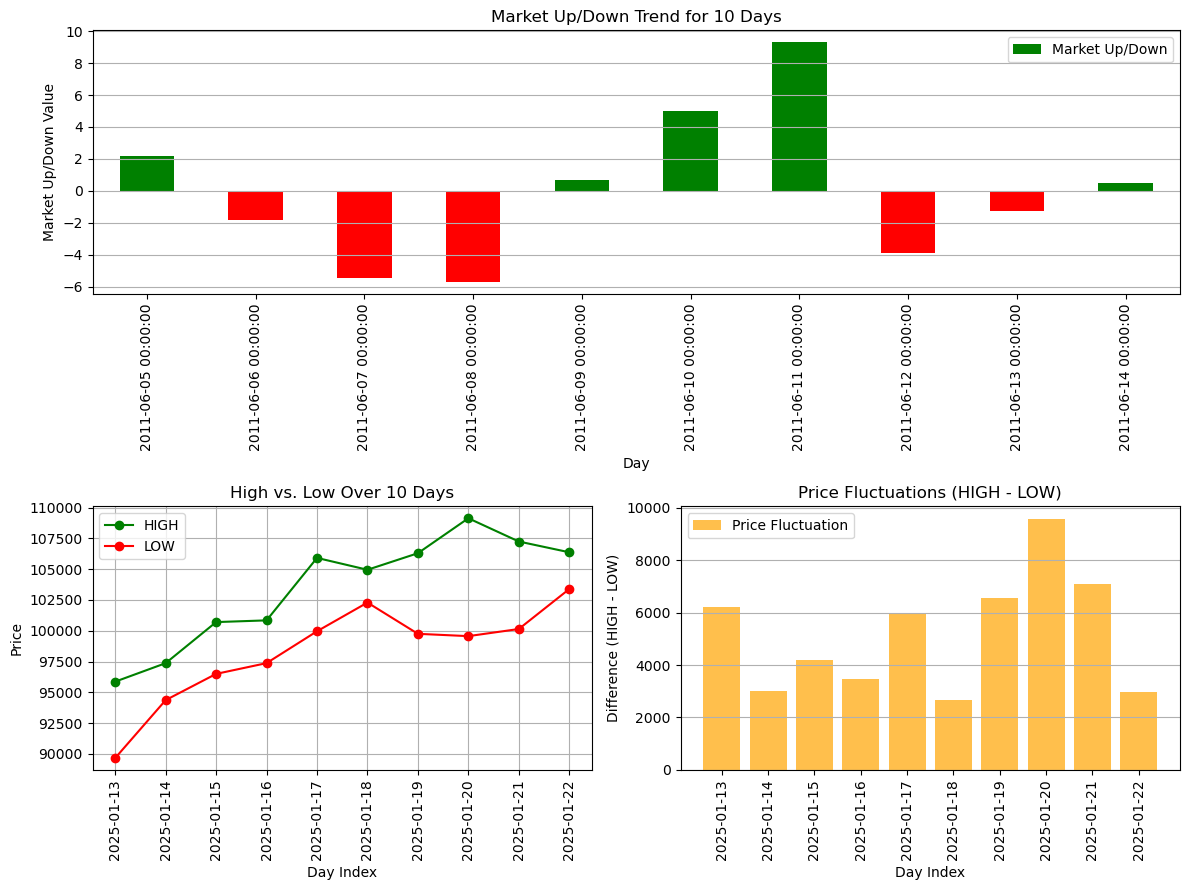

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

# **First Chart (Spanning Full Row)**
plt.subplot(2, 1, 1)
df2_time=df2.set_index('TIMESTAMP')
df2_time['market_up_down'].head(10).plot(kind='bar', 
                                    color=df2_time['market_up_down'].apply(lambda x: 'green' if x > 0 else 'red'), 
                                    label="Market Up/Down")
plt.title("Market Up/Down Trend for 10 Days")
plt.xlabel("Day")
plt.ylabel("Market Up/Down Value")
plt.legend() 
plt.grid(axis='y')

# Subset of Data
df_subset = df2[['HIGH', 'LOW', 'price_fluctuations','TIMESTAMP']].tail(10)

# **Second Chart (Left Side)**
plt.subplot(2, 2, 3)
plt.plot(df_subset.TIMESTAMP, df_subset['HIGH'], label="HIGH", marker='o', color='green')
plt.plot(df_subset.TIMESTAMP, df_subset['LOW'], label="LOW", marker='o', color='red')

plt.xlabel("Day Index")
plt.ylabel("Price")
plt.title("High vs. Low Over 10 Days")
plt.xticks(rotation=90)
plt.legend() 
plt.grid(True)

# **Third Chart (Right Side)**
plt.subplot(2, 2, 4)
plt.bar(df_subset.TIMESTAMP, df_subset['price_fluctuations'], color='orange', alpha=0.7, label="Price Fluctuation")
plt.title("Price Fluctuations (HIGH - LOW)")
plt.xlabel("Day Index")
plt.ylabel("Difference (HIGH - LOW)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
## df2[['HIGH','OPEN','upper_markert_analysis']].head(10)

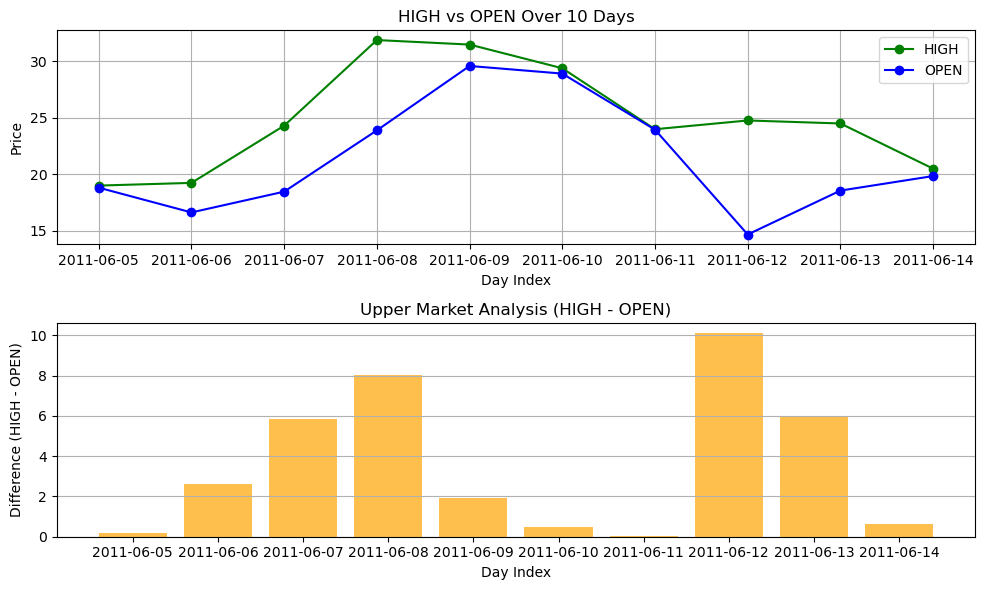

In [36]:


# Select the first 10 rows
df_subset = df2[['HIGH', 'OPEN', 'upper_markert_analysis','TIMESTAMP']].head(10)

# Create a figure with 2 subplots
plt.figure(figsize=(10, 6))

# First subplot: Line plot for HIGH and OPEN
plt.subplot(2, 1, 1)
plt.plot(df_subset.TIMESTAMP, df_subset['HIGH'], label="HIGH", marker='o', color='green')
plt.plot(df_subset.TIMESTAMP, df_subset['OPEN'], label="OPEN", marker='o', color='blue')
plt.title("HIGH vs OPEN Over 10 Days")
plt.xlabel("Day Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Second subplot: Bar plot for upper_markert_analysis
plt.subplot(2, 1, 2)
plt.bar(df_subset.TIMESTAMP, df_subset['upper_markert_analysis'], color='orange', alpha=0.7)
plt.title("Upper Market Analysis (HIGH - OPEN)")
plt.xlabel("Day Index")
plt.ylabel("Difference (HIGH - OPEN)")
plt.grid(axis='y')

# Adjust layout and show
plt.tight_layout()
plt.show()


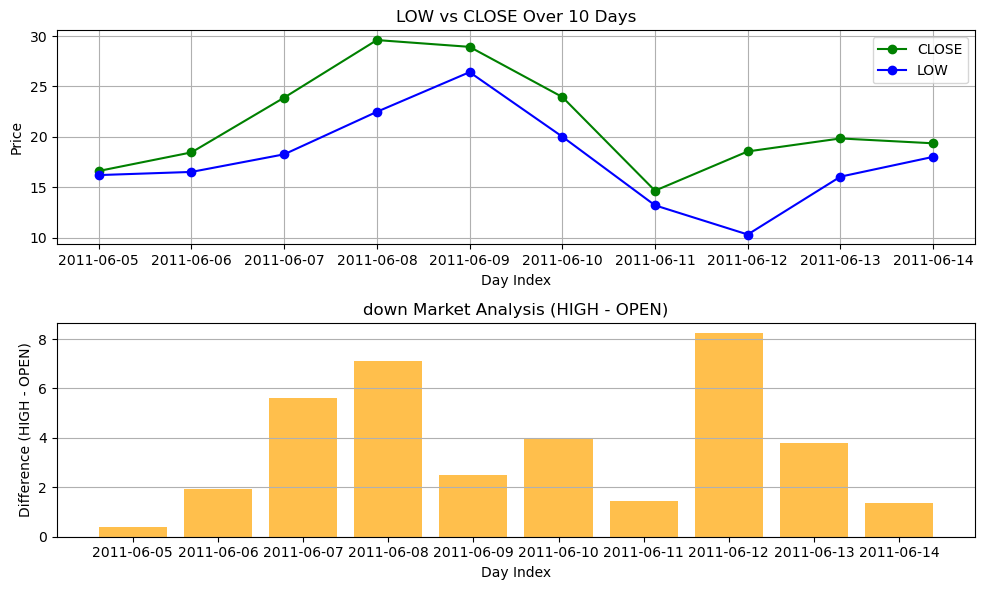

In [37]:


# Select the first 10 rows
df_subset = df2[['CLOSE', 'LOW', 'down_markert_analysis','TIMESTAMP']].head(10)

# Create a figure with 2 subplots
plt.figure(figsize=(10, 6))

# First subplot: Line plot for HIGH and OPEN
plt.subplot(2, 1, 1)
plt.plot(df_subset.TIMESTAMP, df_subset['CLOSE'], label="CLOSE", marker='o', color='green')
plt.plot(df_subset.TIMESTAMP, df_subset['LOW'], label="LOW", marker='o', color='blue')
plt.title("LOW vs CLOSE Over 10 Days")
plt.xlabel("Day Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Second subplot: Bar plot for upper_markert_analysis
plt.subplot(2, 1, 2)
plt.bar(df_subset.TIMESTAMP, df_subset['down_markert_analysis'], color='orange', alpha=0.7)
plt.title("down Market Analysis (HIGH - OPEN)")
plt.xlabel("Day Index")
plt.ylabel("Difference (HIGH - OPEN)")
plt.grid(axis='y')

# Adjust layout and show
plt.tight_layout()
plt.show()


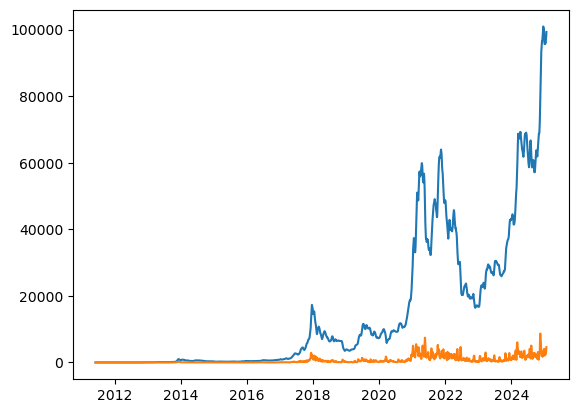

In [38]:
plt.plot(df2['TIMESTAMP'],df2['short_trend_d'])

plt.plot(df2['TIMESTAMP'],df2['short_trend_d_var'])


         

### conclusion
-> this shows that when price increase then var aslo showing the Fluctuations according that we can say that there may be increased speculation

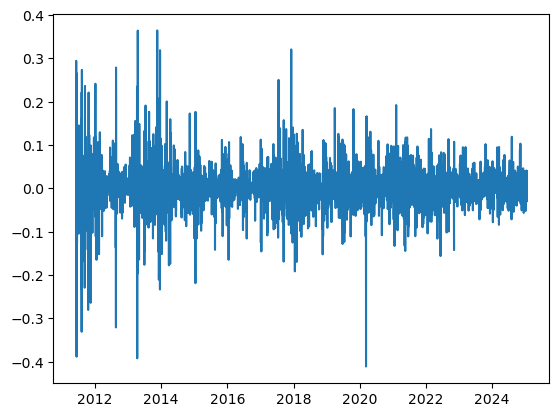

In [39]:
plt.plot(df2['TIMESTAMP'],df2['close_p_change'])



### conclusion
-> pct_shows the growth of the previous day close price

-> there is high Fluctuations towards upper and down from the mean which represents that merket has no stability till 2016

-> but after 2016 there is stability but again market crash on the year of 2020 might be covid-19-20

-> after that again market got more stability 

-> which helps model to predict future 


In [40]:
df2[['VOLUME','Volume_Change']].head(10)

,VOLUME,Volume_Change
19,24278.972,-0.454103
20,55092.474,1.269144
21,53715.037,-0.025002
22,104925.157,0.953367
23,62933.660,-0.400204
24,92208.200,0.465165
25,121869.972,0.321683
26,151194.158,0.240619
27,73421.791,-0.514387
28,36155.990,-0.507558


Text(0.5, 1.0, 'close price')

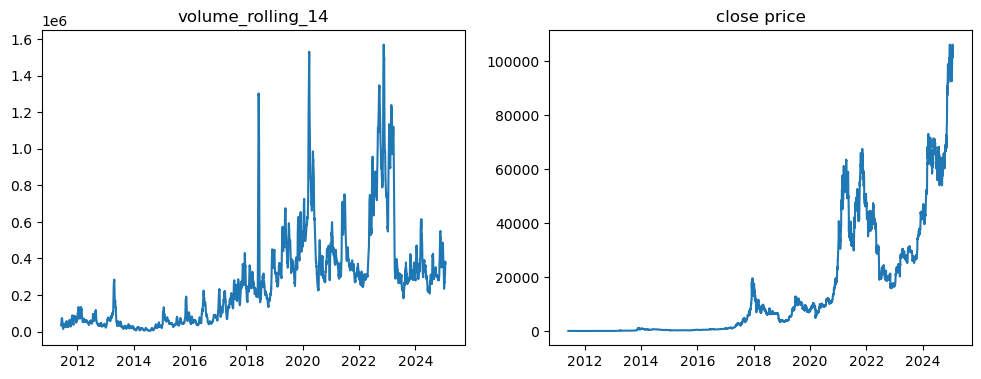

In [41]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(df2['TIMESTAMP'],df2['volume_past_direction'])
plt.title('volume_rolling_14')


plt.subplot(2,2,2)
plt.plot(df2['TIMESTAMP'],df2['CLOSE'])
plt.title('close price')



### conclusion
-> here 2018 has volume rolling(14) indicates that there is high volume in 2018 with increased price value which shows that there is no false breakouts.

->and there is 2020 high volume and price is dreceased that shows bull market 

-> this can guide model to predict future market strength like based on this market will bull or berish

In [42]:
df2[['VOLUME','Volume_Change']]

,VOLUME,Volume_Change
19,24278.972000,-0.454103
20,55092.474000,1.269144
21,53715.037000,-0.025002
22,104925.157000,0.953367
23,62933.660000,-0.400204
...,...,...
4995,273465.987924,-0.346457
4996,424237.748592,0.551336
4997,714224.515381,0.683548
4998,540914.151198,-0.242655


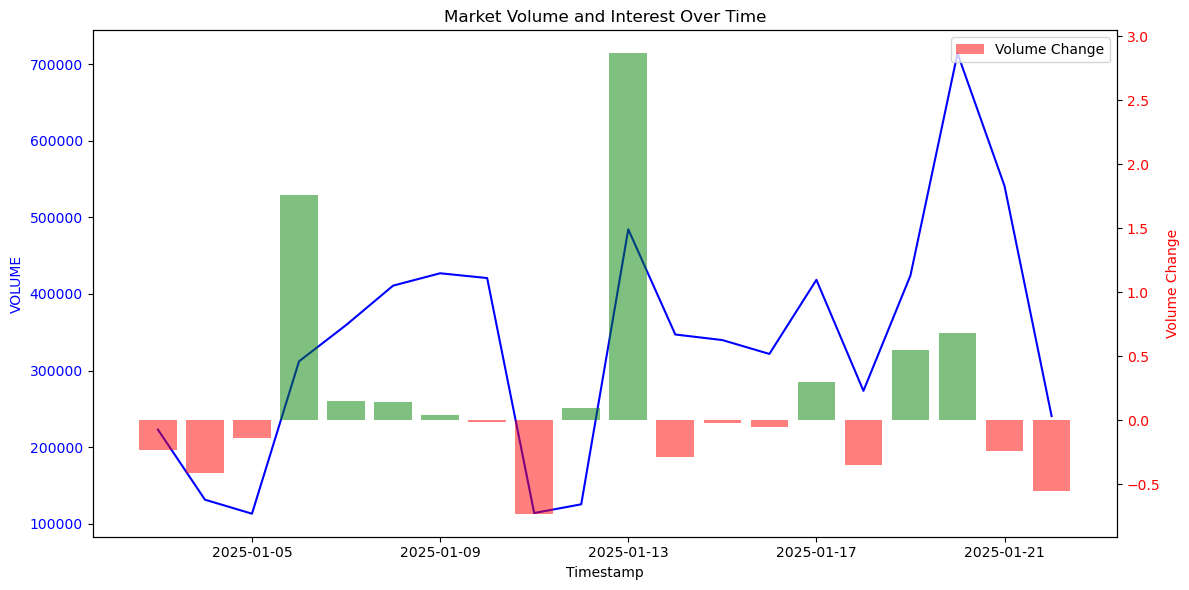

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for VOLUME (Primary Y-axis)
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VOLUME', color='blue')
ax1.plot(df2['TIMESTAMP'].tail(20), df2['VOLUME'].tail(20), color='blue', label='VOLUME')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis for Volume_Change with Bar Plot
ax2 = ax1.twinx()
ax2.set_ylabel('Volume Change', color='red')

# Bar plot: Green for positive change, Red for negative change
colors = df2['Volume_Change'].tail(20).apply(lambda x: 'green' if x > 0 else 'red')
ax2.bar(df2['TIMESTAMP'].tail(20), df2['Volume_Change'].tail(20), color=colors, alpha=0.5, label='Volume Change')

ax2.tick_params(axis='y', labelcolor='red')

plt.title('Market Volume and Interest Over Time')
plt.legend()
fig.tight_layout()
plt.show()


### conclusion
-> if volume_change is > 0 that mean there is interset still occurse if not then market has less movements

-> this can lead to predict the future market strength because volume_change shows that what is the volume growth from the previous day which can lead to predict the future markert 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

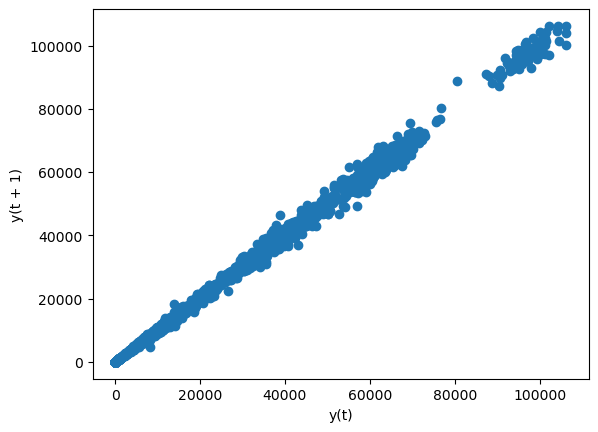

In [44]:
pd.plotting.lag_plot(df2['CLOSE'])

### conclusion
-> shows the strong autocorrelation with previous day for close price because there is linearity

-> which easily represents that previous market can be helpful to predict future 

# final decision 
> **our data has not stationary and weak seasonality so we can not perform arima kind of model so need to make stationary**

> **if we do not want to use model like arima then do feature engeering which can include all market key concepts** 